In [263]:
from bigdatavqa.datautils import DataUtils
from bigdatavqa.divisiveclustering.divisiveclustering import get_coreset_vec_and_weights
from bigdatavqa.coreset import normalize_np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [3]:
data_location = "data"
data_utils = DataUtils(data_location)
try:
    raw_data = data_utils.load_dataset()
except FileNotFoundError:

    raw_data = data_utils.create_dataset(n_samples=1000)

Data saved in data/data.pickle


In [9]:
coreset_vec, coreset_weights = get_coreset_vec_and_weights(raw_data, 25, 10, 20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
coreset_pd = pd.DataFrame(coreset_vec)
coreset_pd["weights"] = coreset_weights
coreset_pd["name"] = [chr(i+65) for i in range(25)]

In [20]:
coreset_pd = coreset_pd.rename(columns={0: 'X', 1:'Y'})

In [34]:
coreset_vec_normalized = normalize_np(coreset_vec, centralize=True)
coreset_weights_normalized = normalize_np(coreset_weights, centralize=True)

In [35]:
coreset_pd["X_norm"] = coreset_vec_normalized[:,0]
coreset_pd["Y_norm"] = coreset_vec_normalized[:,1]
coreset_pd["weights_norm"] = coreset_weights_normalized

In [37]:
coreset_pd.to_csv("coreset_normalized.csv")

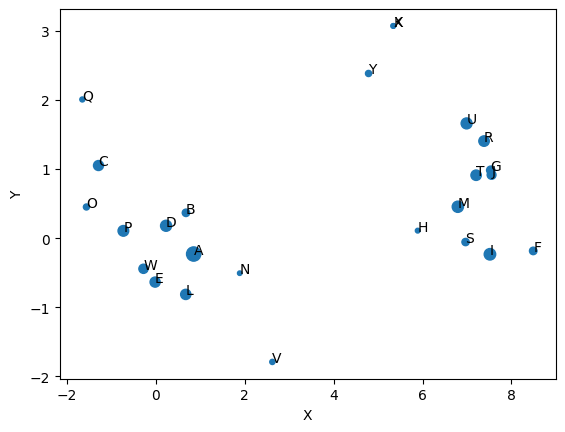

In [46]:
plt.scatter(coreset_pd['X'], coreset_pd['Y'], s=coreset_pd['weights'])
plt.xlabel('X')
plt.ylabel('Y')
# BEGIN: zy8f9d3g4h5j
for i, row in coreset_pd.iterrows():
    x = row['X']
    y = row['Y']
    name = row['name']
    plt.annotate(name, (x, y))

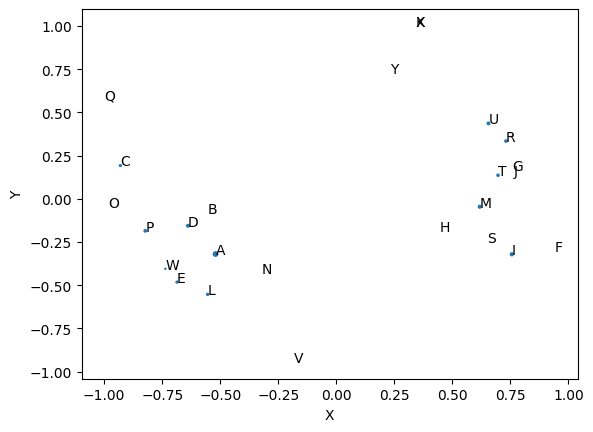

In [51]:
plt.scatter(coreset_pd['X_norm'], coreset_pd['Y_norm'], s=coreset_pd['weights_norm']*10)
plt.xlabel('X')
plt.ylabel('Y')
for i, row in coreset_pd.iterrows():
    x = row['X_norm']
    y = row['Y_norm']
    name = row['name']
    plt.annotate(name, (x, y))


In [65]:
hc = [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'],['A', 'B', 'C', 'D', 'E', 'L', 'N', 'O', 'P', 'Q', 'V', 'W'], ['F', 'G', 'H', 'I', 'J', 'K', 'M', 'R', 'S', 'T', 'U', 'X', 'Y']]

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


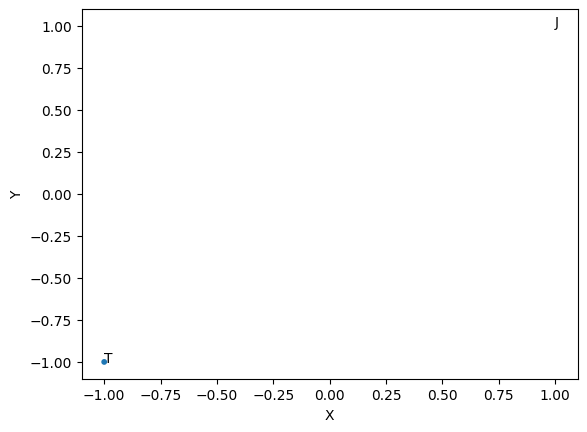

In [252]:
index = 33

selected_index = coreset_pd[coreset_pd['name'].isin(hc[index])].index

selected_vec = coreset_vec_normalized[selected_index]
selected_weights = coreset_weights_normalized[selected_index]
selected_vec = normalize_np(selected_vec, centralize = True)
selected_weights = normalize_np(selected_weights, centralize = True)

selected_coreset_pd = pd.DataFrame(selected_vec)
selected_coreset_pd = selected_coreset_pd.rename(columns = {0:"X", 1:"Y"})
selected_coreset_pd["weights"] = selected_weights
selected_coreset_pd["name"] = [chr(i+65) for i in selected_index]


plt.scatter(selected_coreset_pd['X'], selected_coreset_pd['Y'], s=selected_coreset_pd['weights']*10)
plt.xlabel('X')
plt.ylabel('Y')
for i, row in selected_coreset_pd.iterrows():
    x = row['X']
    y = row['Y']
    name = row['name']
    plt.annotate(name, (x, y))

In [253]:
t1 = selected_coreset_pd[selected_coreset_pd.X < 0].name.values.tolist()
t2 = selected_coreset_pd[selected_coreset_pd.X > 0].name.values.tolist()

In [258]:
t1 = ["E"]

In [259]:
t2 = ["W"]

In [260]:
hc.append(t1)
hc.append(t2)

In [261]:
hc

[['A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y'],
 ['A', 'B', 'C', 'D', 'E', 'L', 'N', 'O', 'P', 'Q', 'V', 'W'],
 ['F', 'G', 'H', 'I', 'J', 'K', 'M', 'R', 'S', 'T', 'U', 'X', 'Y'],
 ['V'],
 ['A', 'B', 'C', 'D', 'E', 'L', 'N', 'O', 'P', 'Q', 'W'],
 ['K', 'X', 'Y'],
 ['F', 'G', 'H', 'I', 'J', 'M', 'R', 'S', 'T', 'U'],
 ['C', 'O', 'Q'],
 ['A', 'B', 'D', 'E', 'L', 'N', 'P', 'W'],
 ['Y'],
 ['K', 'X'],
 ['F', 'H', 'I', 'M', 'S'],
 ['G', 'J', 'R', 'T', 'U'],
 ['C', 'O'],
 ['Q'],
 ['P', 'D', 'B'],
 ['W', 'A', 'E', 'L', 'N'],
 ['K'],
 ['X'],
 ['F', 'I', 'S'],
 ['H', 'M'],
 ['G', 'J', 'T'],
 ['R', 'U'],
 ['O'],
 ['C'],
 ['D', 'P'],
 ['B'],
 ['A', 'N'],
 ['W', 'E', 'L'],
 ['F', 'I'],
 ['S'],
 ['H'],
 ['M'],
 ['J', 'T'],
 ['G'],
 ['R'],
 ['U'],
 ['P'],
 ['D'],
 ['N'],
 ['A'],
 ['E', 'W'],
 ['L'],
 ['I'],
 ['F'],
 ['T'],
 ['J'],
 ['E'],
 ['W']]

In [265]:
with open('hc.pkl', 'wb') as f:
    pickle.dump(hc, f)